torch.Size([60000, 28, 28])
torch.Size([60000])


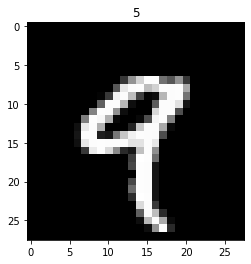

Epoch: 0 |step: 0 |train loss:2.3065
Epoch: 0 |step: 100 |train loss:0.3436
Epoch: 0 |step: 200 |train loss:0.2224
Epoch: 0 |step: 300 |train loss:0.1024
Epoch: 0 |step: 400 |train loss:0.0766
Epoch: 0 |step: 500 |train loss:0.1010
Epoch: 0 |step: 600 |train loss:0.0910
Epoch: 0 |step: 700 |train loss:0.1434
Epoch: 0 |step: 800 |train loss:0.0223
Epoch: 0 |step: 900 |train loss:0.1735
Epoch: 0 |step: 1000 |train loss:0.0197
Epoch: 0 |step: 1100 |train loss:0.0447
Epoch: 1 |step: 0 |train loss:0.0953
Epoch: 1 |step: 100 |train loss:0.0605
Epoch: 1 |step: 200 |train loss:0.0572
Epoch: 1 |step: 300 |train loss:0.0290
Epoch: 1 |step: 400 |train loss:0.0833
Epoch: 1 |step: 500 |train loss:0.0080
Epoch: 1 |step: 600 |train loss:0.0385
Epoch: 1 |step: 700 |train loss:0.0564
Epoch: 1 |step: 800 |train loss:0.0459
Epoch: 1 |step: 900 |train loss:0.0697
Epoch: 1 |step: 1000 |train loss:0.0069
Epoch: 1 |step: 1100 |train loss:0.0187
Epoch: 2 |step: 0 |train loss:0.0098
Epoch: 2 |step: 100 |train 

In [ ]:
import torch           #使用pytorch框架
import torch.nn as nn  #使用類神經網路模塊所有類神經網路的基本類別
from torch.autograd import Variable   #variable像一個容器,可以容納tensor在裡面計算
import torch.utils.data as Data     #隨機抽取data的工具,隨機mini-batch
import torchvision    #用來生成圖片影片的數據集,流行的pretrained model
import matplotlib.pyplot as plt   #輸出圖片工具包


EPOCH = 10                #全部data訓練10次
BATCH_SIZE = 50           #每次訓練隨機丟50張圖像進去
LR =0.001                 #learning rate
DOWNLOAD_MNIST = False    #第一次用要先下載data,所以是True
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(), 
    #把灰階從0~255壓縮到0~1
    download=DOWNLOAD_MNIST
)


print(train_data.train_data.size())
print(train_data.train_labels.size())


plt.imshow(train_data.train_data[4].numpy(),cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

#show 出train data set 中第一張影像

train_loader = Data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle=True)
#shuffle是隨機從data裡讀去資料.

test_data = torchvision.datasets.MNIST(
    root='./mnist/', 
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST,
)

test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1).float(), requires_grad=False)
#requires_grad=False 不參與反向傳播,test data 不用做
 
test_y = test_data.test_labels

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
#搭建網路的起手式,nn.module是所有網路的基類.
#我們開始定義一系列網路如下：  #train data ＝ (1,28,28)      
        self.conv1 = nn.Sequential(
            nn.Conv2d(           
            #convolution2D
                in_channels=1,  
                #input channel(EX:RGB)
                out_channels=16, 
                #output feature maps
                kernel_size=5,   
                #filter大小
                stride=1,        
                #每次convolution移動多少
                padding=2,       
                #在圖片旁邊補0                       
            ),
            nn.ReLU(), #activation function #(16,28,28)
            nn.MaxPool2d(kernel_size=2), #(16,14,14)
        )
        #以上為一層conv + ReLu + maxpool
        
        #快速寫法：
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),  #(32,14,14)
            nn.ReLU(), 
            nn.MaxPool2d(2)   #(32,7,7)
        )
        
        self.out = nn.Linear(32*7*7, 10) #10=0~9
       
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output
       
#forward流程:
#x = x.view(x.size(0), -1) 展平data  


cnn = CNN()


optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_function = nn.CrossEntropyLoss()

#優化器使用Adam
#loss_func 使用CrossEntropy（classification task）



if_use_gpu = 0


for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x, requires_grad=False)
        b_y = Variable(y, requires_grad=False)
#決定跑幾個epoch,enumerate把load進來的data列出來成（x,y）

        if if_use_gpu:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
#使用cuda加速        
        output = cnn(b_x)          #把data丟進網路中
        loss = loss_function(output, b_y)
        optimizer.zero_grad()      #計算loss,初始梯度
        loss.backward()            #反向傳播
        optimizer.step()       

        if step % 100 == 0:
            print('Epoch:', epoch, '|step:', step, '|train loss:%.4f'%loss.data)
        
        #每100steps輸出一次train loss

